In [25]:
import pandas as pd
import numpy as np


df_diab = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')

# print(df_tit.info())
print('Shape of dataframe:', df_diab.shape)
df_diab.head()

Shape of dataframe: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# df_diab.describe().T
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

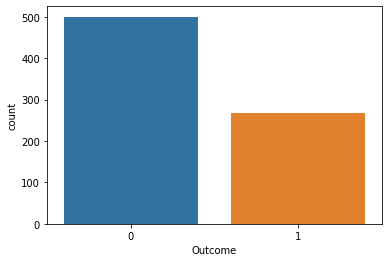

In [33]:
import seaborn as sns
sns.countplot(x=df_diab['Outcome'])

In [34]:
df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df_diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df_diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df_diab.head() #Replaced all 0 values by NaN so it is easy to clean the data

df_diab.fillna(df_diab.mean(), inplace = True) #Filled Mising values with Mean (Imputation)
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


<AxesSubplot:title={'center':'Scaled Data'}>

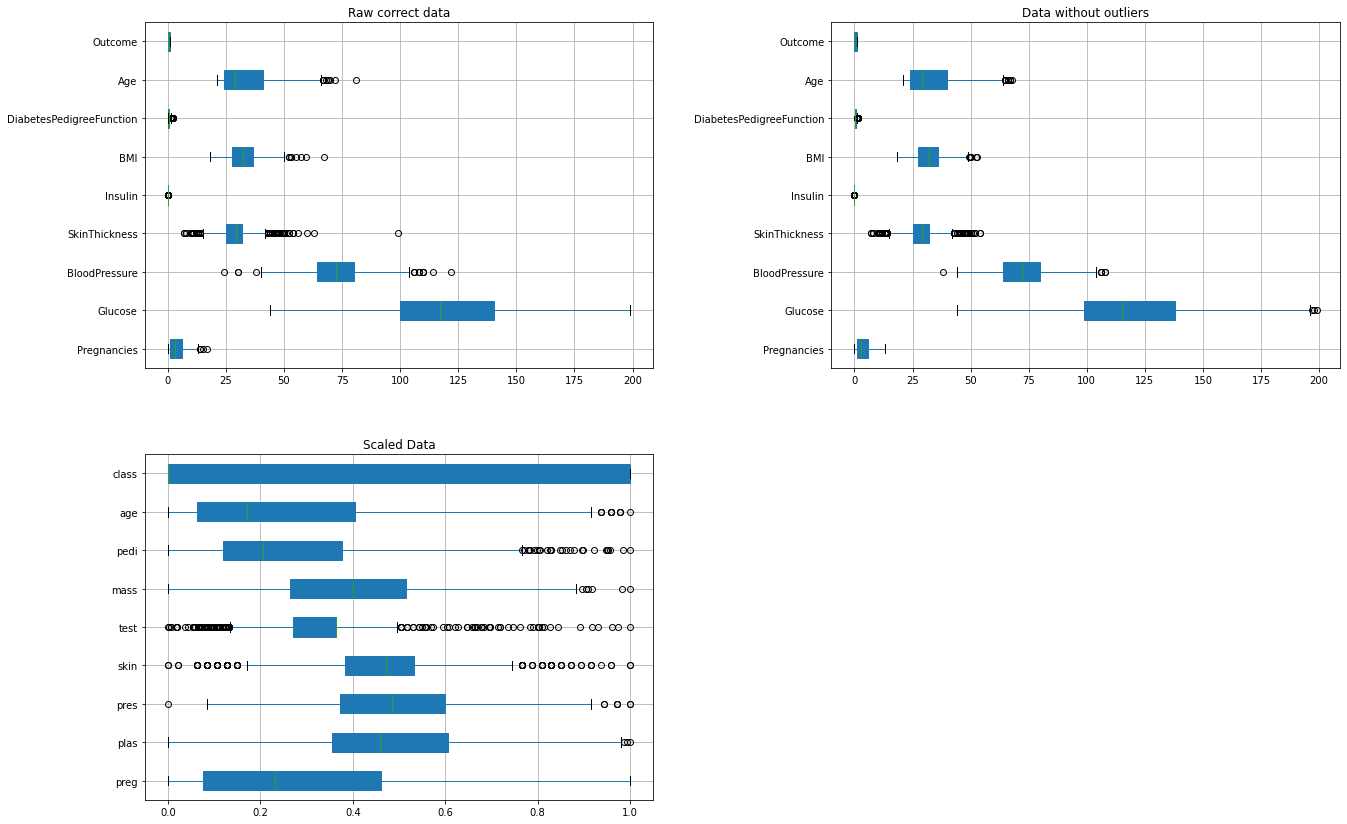

In [52]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

data = df_diab
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# plot raw data
fig = plt.figure(figsize = (20, 12))
plt.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.05, top = 0.95,
                    wspace = 0.35, hspace = 0.25)
plt.subplot(2, 2, 1)
plt.title('Raw correct data')
data.boxplot(vert = False, labels = col_names, patch_artist = True)

# remove outliers and plot results
plt.subplot(2, 2, 2)
plt.title('Data without outliers')
data['Insulin'] = data['Insulin'] * .001
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.boxplot(vert = False, labels = col_names, patch_artist = True)

# scale data and plot results
plt.subplot(2 , 2, 3)
plt.title('Scaled Data')
scaler = MinMaxScaler(feature_range=(0, 1))
data   = pd.DataFrame(scaler.fit_transform(data.values),  columns = col_names)
data.boxplot(vert = False, labels = col_names, patch_artist = True)

# df_diab[:0]

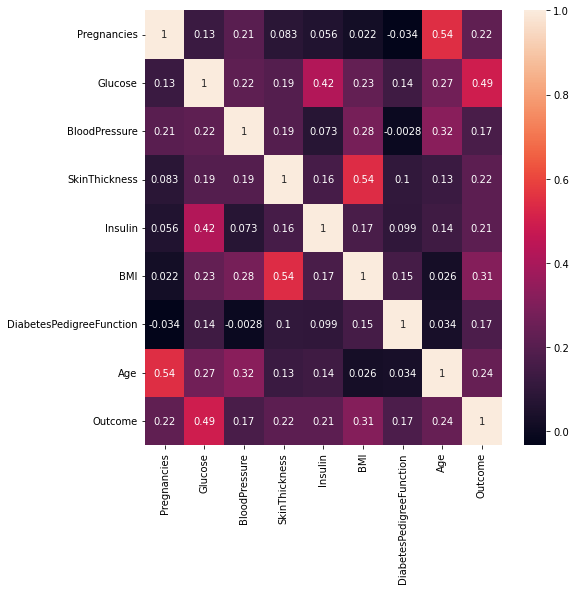

In [38]:
import matplotlib.pyplot as plt # Using seaborn plot to check correlation between features
sns.heatmap(df_diab.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [40]:
# Feature selection

from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
x =  df_diab[df_diab.columns[:8]]
y = df_diab.Outcome
RFclf.fit(x,y)
feature_imp = pd.DataFrame(RFclf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Glucose,0.257853
BMI,0.155798
Age,0.135897
DiabetesPedigreeFunction,0.122454
Insulin,0.084305
BloodPressure,0.084139
Pregnancies,0.081767
SkinThickness,0.077787


In [58]:
from sklearn.feature_selection import RFE
from sklearn import metrics

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x,y)
#     print(f"Accuracy with Feature {i}: ",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

print("Important Features are: ", list(df_diab.columns[:8][rfe.support_]))

Important Features are:  ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [69]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

features = df_diab[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
labels = df_diab.Outcome
features.head()

features_train,features_test,labels_train,labels_test = train_test_split(features,labels,
                                                                         stratify=df_diab.Outcome,
                                                                         shuffle = True, 
                                                                         test_size=0.2, 
                                                                         random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', features_train.shape)
print('Shape of testing feature:', features_test.shape)
print('Shape of training label:', labels_train.shape)
print('Shape of testing label:', labels_test.shape)

Shape of training feature: (614, 6)
Shape of testing feature: (154, 6)
Shape of training label: (614,)
Shape of testing label: (154,)


In [74]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LRclf = LogisticRegression()
LRclf.fit(features_train,labels_train)
labels_pred = LRclf.predict(features_test)
LRclf.score(features_test,labels_test)

# kfold = KFold(n_splits=5)
# cv_score = cross_val_score(LRclf,features,labels,cv=kfold,scoring="accuracy")
# cv_mean = pd.DataFrame(cv_score.mean(), features, labels)
# cv_mean.columns=["Accuracy"]
# cv_mean.sort_values(by="Accuracy",ascending=False)

# Calculate accuracy, precision, recall, f1-score, and kappa score
acc = metrics.accuracy_score(labels_test, labels_pred)
prec = metrics.precision_score(labels_test, labels_pred)
rec = metrics.recall_score(labels_test, labels_pred)
f1 = metrics.f1_score(labels_test, labels_pred)

# Display confussion matrix
cm = metrics.confusion_matrix(labels_test, labels_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.7467532467532467
Precision: 0.6923076923076923
Recall: 0.5
F1 Score: 0.5806451612903226
Confusion Matrix:
 [[88 12]
 [27 27]]
